In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pylab as plt

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='dataset3/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
    
)

class_names = train_ds.class_names


validation_ds = keras.utils.image_dataset_from_directory(
    directory='dataset3/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
    
)

Found 4039 files belonging to 2 classes.
Found 1011 files belonging to 2 classes.


In [4]:
#nomalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.7335 - loss: 5.1984 - val_accuracy: 0.5000 - val_loss: 19.9719
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8091 - loss: 2.3845 - val_accuracy: 0.5584 - val_loss: 5.1814
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.8524 - loss: 1.0581 - val_accuracy: 0.6663 - val_loss: 2.1817
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.8821 - loss: 0.6147 - val_accuracy: 0.8059 - val_loss: 0.9189
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.9195 - loss: 0.3113 - val_accuracy: 0.8713 - val_loss: 0.6084
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.9255 - loss: 0.2822 - val_accuracy: 0.8901 - val_loss: 0.5858
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.9406 - loss: 0.1893 - val_accuracy: 0.8307 - val_loss: 0.7920
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 159s 1s/step - accuracy: 0.9514 - loss: 0.1574 - val_acc

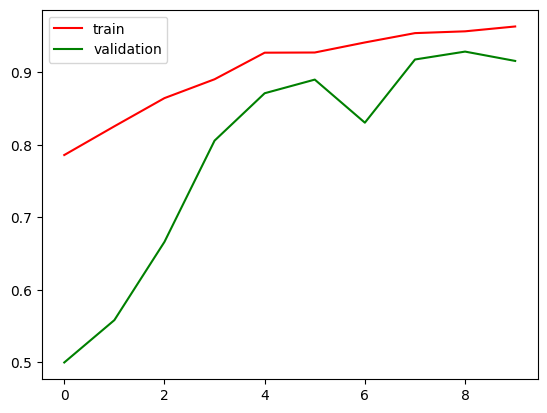

In [24]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()


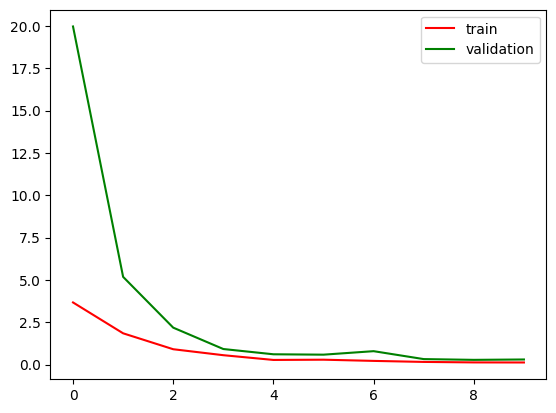

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


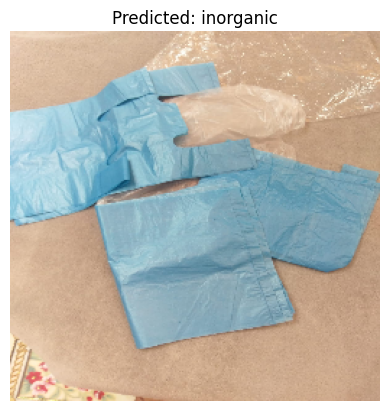

In [53]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# 1,2,11,13,27,117,12,6,9,60
img_path = 'sample/9.jpg' 

img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = int(prediction[0][0] > 0.5)

plt.imshow(img)
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis('off')
plt.show()


In [48]:
model.save("my_model.keras")
